57344/57026 [==============================] - 0s 0us/step
Epoch 1/100
4/4 - 0s - loss: 476.2061 - val_loss: 123.3606
Epoch 2/100
4/4 - 0s - loss: 108.0787 - val_loss: 100.2522
Epoch 3/100
4/4 - 0s - loss: 84.1884 - val_loss: 135.8349
Epoch 4/100
4/4 - 0s - loss: 101.0449 - val_loss: 62.3334
Epoch 5/100
4/4 - 0s - loss: 60.0881 - val_loss: 58.9590
Epoch 6/100
4/4 - 0s - loss: 57.1399 - val_loss: 53.5922
Epoch 7/100
4/4 - 0s - loss: 52.0405 - val_loss: 59.9598
Epoch 8/100
4/4 - 0s - loss: 48.9090 - val_loss: 78.5067
Epoch 9/100
4/4 - 0s - loss: 48.9005 - val_loss: 47.2382
Epoch 10/100
4/4 - 0s - loss: 42.1446 - val_loss: 43.9580
Epoch 11/100
4/4 - 0s - loss: 42.2428 - val_loss: 43.2656
Epoch 12/100
4/4 - 0s - loss: 40.9051 - val_loss: 42.2306
Epoch 13/100
4/4 - 0s - loss: 48.8418 - val_loss: 88.2703
Epoch 14/100
4/4 - 0s - loss: 71.5230 - val_loss: 98.2063
Epoch 15/100
4/4 - 0s - loss: 62.4025 - val_loss: 45.8251
Epoch 16/100
4/4 - 0s - loss: 35.5575 - val_loss: 36.4244
Epoch 17/100
4/4

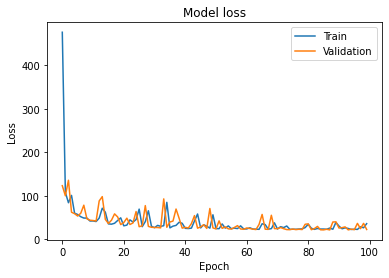

In [6]:
from keras import layers, models

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x,y)
        
        self.compile(loss='mse', optimizer='sgd')
        
from keras import datasets
from sklearn import preprocessing


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)
    
    return (X_train, y_train),(X_test, y_test)

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100,
                       batch_size=100, validation_split=0.2,
                       verbose=2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(history)
    plt.show()
    
if __name__ == '__main__'    :
    main()